# Case Study: How Can a Wellness Technology Company Play It Smart?
Key Info:
- I'm working at Bellabeat, a high-tech manufacturer of health-focused products for women

p.s. I'm not that familiar with R compared to Python.


Presentation Link: [Bellabeat: How Can We Play it Smart?](https://docs.google.com/presentation/d/e/2PACX-1vQ37jwF3sXImdFdRO6lj3yZwqsxyn-nzCBkndP60AFZW-bjX7xMPUpJV2V0KgXKJwjMtSQQo19oekat/pub?start=false&loop=false&delayms=3000)

# <font color="red">Ask</font>
Problem: The data isn't maximized in providing better business decisions for the company

Business Task: Focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, make a like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

Initial Thoughts:
- The demographic and age may be a factor in predicting the people who are most likely to buy.

Key Stakeholders: Urska Srsen, Sando Mur, Marketing Analytics Team

Possible data & metrics: usage, age distribution, smartphone devices

# <font color="red">Prepare</font>
- The dataset from the company may be used for this analysis. However, since the case study only permits the use of public dataset, we'll use the following:
- [Dataset Link](https://www.kaggle.com/datasets/arashnic/fitbit)

In [1]:
# Importing packages
library(tidyverse)
library(dplyr)
library(tidyr)
library(lubridate)
library(pastecs)
library(colorspace)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘pastecs’


The following objects are masked from ‘package:dplyr’:

    first, last


The following object is masked from ‘package:tidyr’:

    extract




In [2]:
# Let's take a look at the data first
# Separate file_name to directory, so we can easily view the df of each file
daily_activity <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv')

head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,3/25/2016,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,3/26/2016,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,3/27/2016,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,3/28/2016,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,3/29/2016,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,3/30/2016,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


## Summary Statistics

In [3]:
# Let's perform summary statistics to get some idea about the data
stat.desc(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
nbr.val,4.570000e+02,NA,4.570000e+02,457.0000000,457.0000000,457.00000000,457.0000000,457.00000000,457.0000000,4.570000e+02,457.000000,457.000000,4.570000e+02,4.570000e+02,4.570000e+02
nbr.null,0.000000e+00,NA,6.100000e+01,63.0000000,66.0000000,433.00000000,245.0000000,228.00000000,74.0000000,4.190000e+02,241.000000,227.000000,7.200000e+01,0.000000e+00,5.000000e+00
nbr.na,0.000000e+00,NA,0.000000e+00,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
min,1.503960e+09,NA,0.000000e+00,0.0000000,0.0000000,0.00000000,0.0000000,0.00000000,0.0000000,0.000000e+00,0.000000,0.000000,0.000000e+00,3.200000e+01,0.000000e+00
max,8.877689e+09,NA,2.849700e+04,27.5300007,27.5300007,6.72705698,21.9200001,6.40000010,12.5100002,1.000000e-01,202.000000,660.000000,7.200000e+02,1.440000e+03,4.562000e+03
range,7.373729e+09,NA,2.849700e+04,27.5300007,27.5300007,6.72705698,21.9200001,6.40000010,12.5100002,1.000000e-01,202.000000,660.000000,7.200000e+02,1.408000e+03,4.562000e+03
sum,2.115268e+12,NA,2.991779e+06,2131.2299980,2106.6999986,81.99830997,539.6699990,218.73999961,1320.8200000,8.700000e-01,7597.000000,5973.000000,7.772200e+04,4.548440e+05,1.000580e+06
median,4.057193e+09,NA,5.986000e+03,4.0900002,4.0900002,0.00000000,0.0000000,0.02000000,2.9300001,0.000000e+00,0.000000,1.000000,1.810000e+02,1.057000e+03,2.062000e+03
mean,4.628595e+09,NA,6.546562e+03,4.6635230,4.6098468,0.17942737,1.1808972,0.47864333,2.8901969,1.903720e-03,16.623632,13.070022,1.700700e+02,9.952823e+02,2.189453e+03


In [4]:
# Let's convert the following csv to a dataframe (hourly dataset)
hourly_calories <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv')
hourly_intensities <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')
hourly_steps <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv')

# For simplicity, let's just analyze the narrow dataset -- check analyze section for more info on why.

In [5]:
# Similar to the hourly dataset, the hourly has calories, intensities, and steps (except METs)
# The minute dataset might be more useful for more accurate sending of notifications
minute_calories <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv')
minute_intensities <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv')
minute_steps <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv')
minute_sleep <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv')
minute_mets <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv')

head(minute_calories)
head(minute_intensities)
head(minute_steps)
head(minute_sleep)
head(minute_mets)

,Id,ActivityMinute,Calories
,<dbl>,<chr>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,0.7865
2,1503960366,4/12/2016 12:01:00 AM,0.7865
3,1503960366,4/12/2016 12:02:00 AM,0.7865
4,1503960366,4/12/2016 12:03:00 AM,0.7865
5,1503960366,4/12/2016 12:04:00 AM,0.7865
6,1503960366,4/12/2016 12:05:00 AM,0.9438


,Id,ActivityMinute,Intensity
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,0
2,1503960366,4/12/2016 12:01:00 AM,0
3,1503960366,4/12/2016 12:02:00 AM,0
4,1503960366,4/12/2016 12:03:00 AM,0
5,1503960366,4/12/2016 12:04:00 AM,0
6,1503960366,4/12/2016 12:05:00 AM,0


,Id,ActivityMinute,Steps
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,0
2,1503960366,4/12/2016 12:01:00 AM,0
3,1503960366,4/12/2016 12:02:00 AM,0
4,1503960366,4/12/2016 12:03:00 AM,0
5,1503960366,4/12/2016 12:04:00 AM,0
6,1503960366,4/12/2016 12:05:00 AM,0


,Id,date,value,logId
,<dbl>,<chr>,<int>,<dbl>
1,1503960366,4/12/2016 2:47:30 AM,3,11380564589
2,1503960366,4/12/2016 2:48:30 AM,2,11380564589
3,1503960366,4/12/2016 2:49:30 AM,1,11380564589
4,1503960366,4/12/2016 2:50:30 AM,1,11380564589
5,1503960366,4/12/2016 2:51:30 AM,1,11380564589
6,1503960366,4/12/2016 2:52:30 AM,1,11380564589


,Id,ActivityMinute,METs
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,10
2,1503960366,4/12/2016 12:01:00 AM,10
3,1503960366,4/12/2016 12:02:00 AM,10
4,1503960366,4/12/2016 12:03:00 AM,10
5,1503960366,4/12/2016 12:04:00 AM,10
6,1503960366,4/12/2016 12:05:00 AM,12


In [6]:
heartrate <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv')
head(heartrate)

,Id,Time,Value
,<dbl>,<chr>,<int>
1,2022484408,4/12/2016 7:21:00 AM,97
2,2022484408,4/12/2016 7:21:05 AM,102
3,2022484408,4/12/2016 7:21:10 AM,105
4,2022484408,4/12/2016 7:21:20 AM,103
5,2022484408,4/12/2016 7:21:25 AM,101
6,2022484408,4/12/2016 7:22:05 AM,95


In [7]:
weight <- read.csv('/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv')
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12


### Summary statistics Insights
- There's a lot of missing values in the loggedActitivitiesDistance, which might not be helpful for our analysis. Let's drop it in the meantime.

### Some Insights on the dataset:
- It consists of 18 csv files that might be useful for analysis
- Each data consists of 940 rows
- The datetime can be divided into daily, hourly, minute
- The wide data may be useful when we use deep learning/neural networks, however, for simplicity let's just narrow it down to just machine learning models
- METs have been mentioned in the dataset, but I'm not familiar with this. A quick google search would define it as:
    - A Metabolic equivalent of Task (MET) is a ratio of your working metabolic rate relative to your resting metabolic rate.
- The frequency of tracking may be daily, hourly, minute, seconds, and sporadic

### Data Descriptions
#### Daily
- dailyActivity_merged.csv
    - 15 Columns:
| Columns | Description | Remarks |
| ------- | ------- | ------- |
| ActivityDate | The date the activity was performed |  |
| ID | Unique ID for each user |  |
| TotalSteps | |  |
| TotalDistance | | Assuming distance is in km |
| TrackerDistance | |  |
| LoggedActivitiesDistance | |  |
| VeryActiveDistance | |  |
| ModeratelyActiveDistance | |  |
| LightActiveDistance | |  |
| SedentaryActiveDistance | |  |
| VeryActiveMinutes | |  |
| FairlyActiveMinutes | |  |
| LightlyActiveMinutes | |  |
| SedentaryMinutes | |  |
| Calories: Assuming | | It is in cal |

    - These columns are the features in dailyCalories_merged, dailyIntesities_merged,  and dailySteps_merged as well:
        - dailyCalories_merged.csv 
        - dailyIntensities_merged.csv 
        - dailySteps_merged.csv 
- sleepDay_merged.csv


#### Hourly
- hourlyCalories_merged.csv 
- hourlyIntensities_merged.csv 
- hourlySteps_merged.csv 

#### Minute

    - minuteSleep_merged.csv 
    
    Wide
    - minuteCaloriesWide_merged.csv 
    - minuteIntensitiesWide_merged.csv 
    - minuteStepsWide_merged.csv 

    Long
    - minuteCaloriesNarrow_merged.csv 
    - minuteIntensitiesNarrow_merged.csv 
    - minuteMETsNarrow_merged.csv 
    - minuteStepsNarrow_merged.csv 

#### Seconds
- heartrate_seconds_merged.csv 

Sporadic
- weightLogInfo_merged.csv

Observations:
- The hourly calories, intensities, and steps aren't merged together.
- Determining the activity for each hour might be useful for personalized notifications for each individual at a specific time (when to exercise, sleep, etc.).

# <font color="red">Process</font>

In [8]:
# Let's convert the incorrect data types to the appropriate data types
# It looks like we can't convert the id column because there's a limitation in the range of integers in r which is around ± 2 × 10^9
# The maximum value for ID is 8.87^9

# We've converted the data type for Minutes columns to int, and date to datetime
daily_activity <- daily_activity %>%
    mutate_at(vars(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories), as.integer)

daily_activity$ActivityDate=as.POSIXct(daily_activity$ActivityDate, format="%m/%d/%Y", tz=Sys.timezone())

head(daily_activity)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,2016-03-25,11004,7.11,7.11,0,2.57,0.46,4.07,0,33,12,205,804,1819
2,1503960366,2016-03-26,17609,11.55,11.55,0,6.92,0.73,3.91,0,89,17,274,588,2154
3,1503960366,2016-03-27,12736,8.53,8.53,0,4.66,0.16,3.71,0,56,5,268,605,1944
4,1503960366,2016-03-28,13231,8.93,8.93,0,3.19,0.79,4.95,0,39,20,224,1080,1932
5,1503960366,2016-03-29,12041,7.85,7.85,0,2.16,1.09,4.61,0,28,28,243,763,1886
6,1503960366,2016-03-30,10970,7.16,7.16,0,2.36,0.51,4.29,0,30,13,223,1174,1820


In [9]:
# Let's merge the hourly dataset
hourly_activity <- left_join(hourly_steps, by=c("Id", "ActivityHour"), left_join(hourly_calories, hourly_intensities, by=c("Id", "ActivityHour")))

head(hourly_activity)

,Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity
,<dbl>,<chr>,<int>,<int>,<int>,<dbl>
1,1503960366,4/12/2016 12:00:00 AM,373,81,20,0.333333
2,1503960366,4/12/2016 1:00:00 AM,160,61,8,0.133333
3,1503960366,4/12/2016 2:00:00 AM,151,59,7,0.116667
4,1503960366,4/12/2016 3:00:00 AM,0,47,0,0.000000
5,1503960366,4/12/2016 4:00:00 AM,0,48,0,0.000000
6,1503960366,4/12/2016 5:00:00 AM,0,48,0,0.000000


In [10]:
# Then let's convert the data types for the hourly activity
hourly_activity$ActivityHour=as.POSIXct(hourly_activity$ActivityHour, format="%m/%d/%Y %I:%M:%S %p", tz="UTC")

head(hourly_activity)

,Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity
,<dbl>,<dttm>,<int>,<int>,<int>,<dbl>
1,1503960366,2016-04-12 00:00:00,373,81,20,0.333333
2,1503960366,2016-04-12 01:00:00,160,61,8,0.133333
3,1503960366,2016-04-12 02:00:00,151,59,7,0.116667
4,1503960366,2016-04-12 03:00:00,0,47,0,0.000000
5,1503960366,2016-04-12 04:00:00,0,48,0,0.000000
6,1503960366,2016-04-12 05:00:00,0,48,0,0.000000


In [11]:
# Before we could plot the stacked area, we must convert the dataframe from wide to long format
activity_long <- daily_activity  %>%
pivot_longer(cols=c('VeryActiveDistance', 'ModeratelyActiveDistance', 
                    'LightActiveDistance', 'SedentaryActiveDistance'), names_to="DistanceType",
            values_to="Distance") %>%
pivot_longer(cols=c('VeryActiveMinutes', 'FairlyActiveMinutes', 
                    'LightlyActiveMinutes', 'SedentaryMinutes'), names_to="ActivityType",
            values_to="Minutes")

head(activity_long)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,Calories,DistanceType,Distance,ActivityType,Minutes
<dbl>,<dttm>,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<chr>,<int>
1503960366,2016-03-25,11004,7.11,7.11,0,1819,VeryActiveDistance,2.57,VeryActiveMinutes,33
1503960366,2016-03-25,11004,7.11,7.11,0,1819,VeryActiveDistance,2.57,FairlyActiveMinutes,12
1503960366,2016-03-25,11004,7.11,7.11,0,1819,VeryActiveDistance,2.57,LightlyActiveMinutes,205
1503960366,2016-03-25,11004,7.11,7.11,0,1819,VeryActiveDistance,2.57,SedentaryMinutes,804
1503960366,2016-03-25,11004,7.11,7.11,0,1819,ModeratelyActiveDistance,0.46,VeryActiveMinutes,33
1503960366,2016-03-25,11004,7.11,7.11,0,1819,ModeratelyActiveDistance,0.46,FairlyActiveMinutes,12


In [12]:
# Let's merge the minute dataset
minute_activity <- left_join(minute_mets, left_join(minute_steps, by=c("Id", "ActivityMinute"), left_join(minute_calories, minute_intensities, by=c("Id", "ActivityMinute"))), by=c("Id", "ActivityMinute"))

In [13]:
# Then let's convert the data types for the hourly activity
minute_activity$ActivityMinute=as.POSIXct(minute_activity$ActivityMinute, format="%m/%d/%Y %I:%M:%S %p", tz="UTC")

head(minute_activity)

,Id,ActivityMinute,METs,Steps,Calories,Intensity
,<dbl>,<dttm>,<int>,<int>,<dbl>,<int>
1,1503960366,2016-04-12 00:00:00,10,0,0.7865,0
2,1503960366,2016-04-12 00:01:00,10,0,0.7865,0
3,1503960366,2016-04-12 00:02:00,10,0,0.7865,0
4,1503960366,2016-04-12 00:03:00,10,0,0.7865,0
5,1503960366,2016-04-12 00:04:00,10,0,0.7865,0
6,1503960366,2016-04-12 00:05:00,12,0,0.9438,0


In [14]:
# Let's convert the data types for the heartrate dataset
heartrate$Time=as.POSIXct(heartrate$Time, format="%m/%d/%Y %I:%M:%S %p", tz="UTC")

head(heartrate)

,Id,Time,Value
,<dbl>,<dttm>,<int>
1,2022484408,2016-04-12 07:21:00,97
2,2022484408,2016-04-12 07:21:05,102
3,2022484408,2016-04-12 07:21:10,105
4,2022484408,2016-04-12 07:21:20,103
5,2022484408,2016-04-12 07:21:25,101
6,2022484408,2016-04-12 07:22:05,95


In [15]:
# Let's extract just the hour for the hourly, minute, and heartrate dataset
hourly_activity$HourOnly = format(hourly_activity$ActivityHour, format="%T")
minute_activity$MinuteOnly = format(minute_activity$ActivityMinute, format="%T")
heartrate$TimeOnly = format(heartrate$Time, format="%T")

In [16]:
head(heartrate)

,Id,Time,Value,TimeOnly
,<dbl>,<dttm>,<int>,<chr>
1,2022484408,2016-04-12 07:21:00,97,07:21:00
2,2022484408,2016-04-12 07:21:05,102,07:21:05
3,2022484408,2016-04-12 07:21:10,105,07:21:10
4,2022484408,2016-04-12 07:21:20,103,07:21:20
5,2022484408,2016-04-12 07:21:25,101,07:21:25
6,2022484408,2016-04-12 07:22:05,95,07:22:05


### METs

From healthline.com:
- METs = metabolic equivalents.
- 1 MET is defined as the energy you use when you’re resting or sitting still.
- An activity equal to 4 METs means you're exerting 4 times when you're resting or sitting
- MET might be a more accurate description of activity compared to intensity

We can extract the formula for height by using the BMI formula
$$BMI = \frac{weight}{height^2}$$
$$height^2 = \frac{weight}{BMI}$$
$$\boxed{height = \sqrt{\frac{weight}{BMI}}}$$

Also from WHO BMI classification:

| BMI | Nutritional Status |
| ------ | ------ |
| Below 18.5 | Underweight |
| 18.5–24.9 | Normal weight |
| 25.0–29.9 | Pre-obesity |
| 30.0–34.9 | Obesity class I |
| 35.0–39.9 | Obesity class II |
| Above 40 | Obesity class III |

Source: https://www.who.int/europe/news-room/fact-sheets/item/a-healthy-lifestyle---who-recommendations

In [17]:
# From the weight dataset, we could use the bmi and weight feature to calculate for height.
# However, I can't think if that would be useful for our analysis, but we can't assume that.
# Let's use meter and follow the metric system just because :)

weight$HeightM = sqrt(weight$WeightKg/weight$BMI)

weight$BMI_Class <- ifelse(weight$BMI < 18.5, "Underweight", ifelse(weight$BMI >= 18.5 & weight$BMI < 25, "Normal weight",
                                                                    ifelse(weight$BMI >= 25 & weight$BMI < 30, "Pre-obesity", 
                                                                           ifelse(weight$BMI >= 30 & weight$BMI < 35, "Obesity class I",
                                                                                 ifelse(weight$BMI >= 35 & weight$BMI < 40, "Obesity class II", 
                                                                                        "Obesity Class III")))))

In [18]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,HeightM,BMI_Class
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12,1.523908,Normal weight
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12,1.523908,Normal weight
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12,1.675757,Obesity Class III
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12,1.625840,Normal weight
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12,1.625352,Normal weight
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12,1.624045,Pre-obesity


# <font color="red">Analyze</font>

- The two variables we want to see the stacked plot for are:
    - Distance & DistanceType
    - MInutes & ActivityType

### Stacked Plot - Activity Category daily

Saving 12.5 x 6.67 in image


[1] "We can see a strong correlation between TotalSteps and TotalDistance"


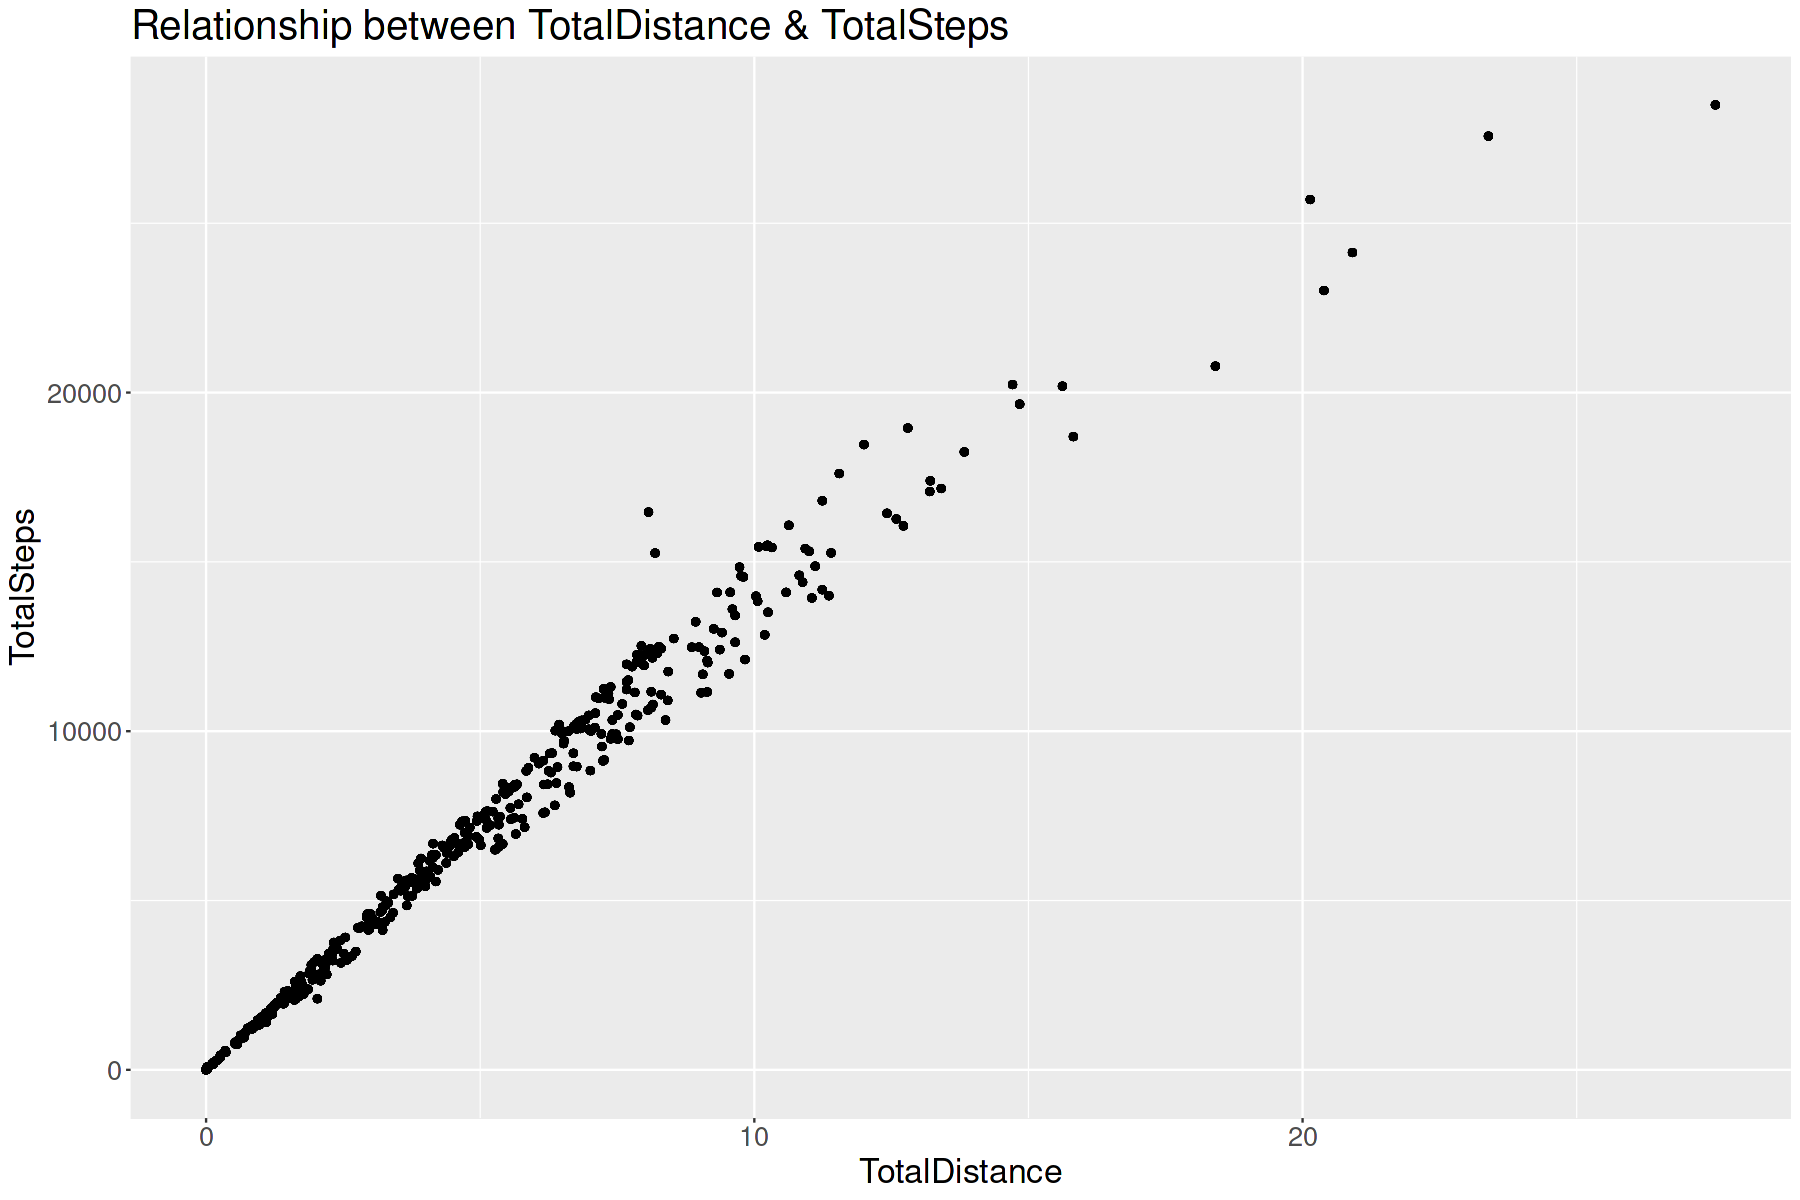

Saving 12.5 x 6.67 in image


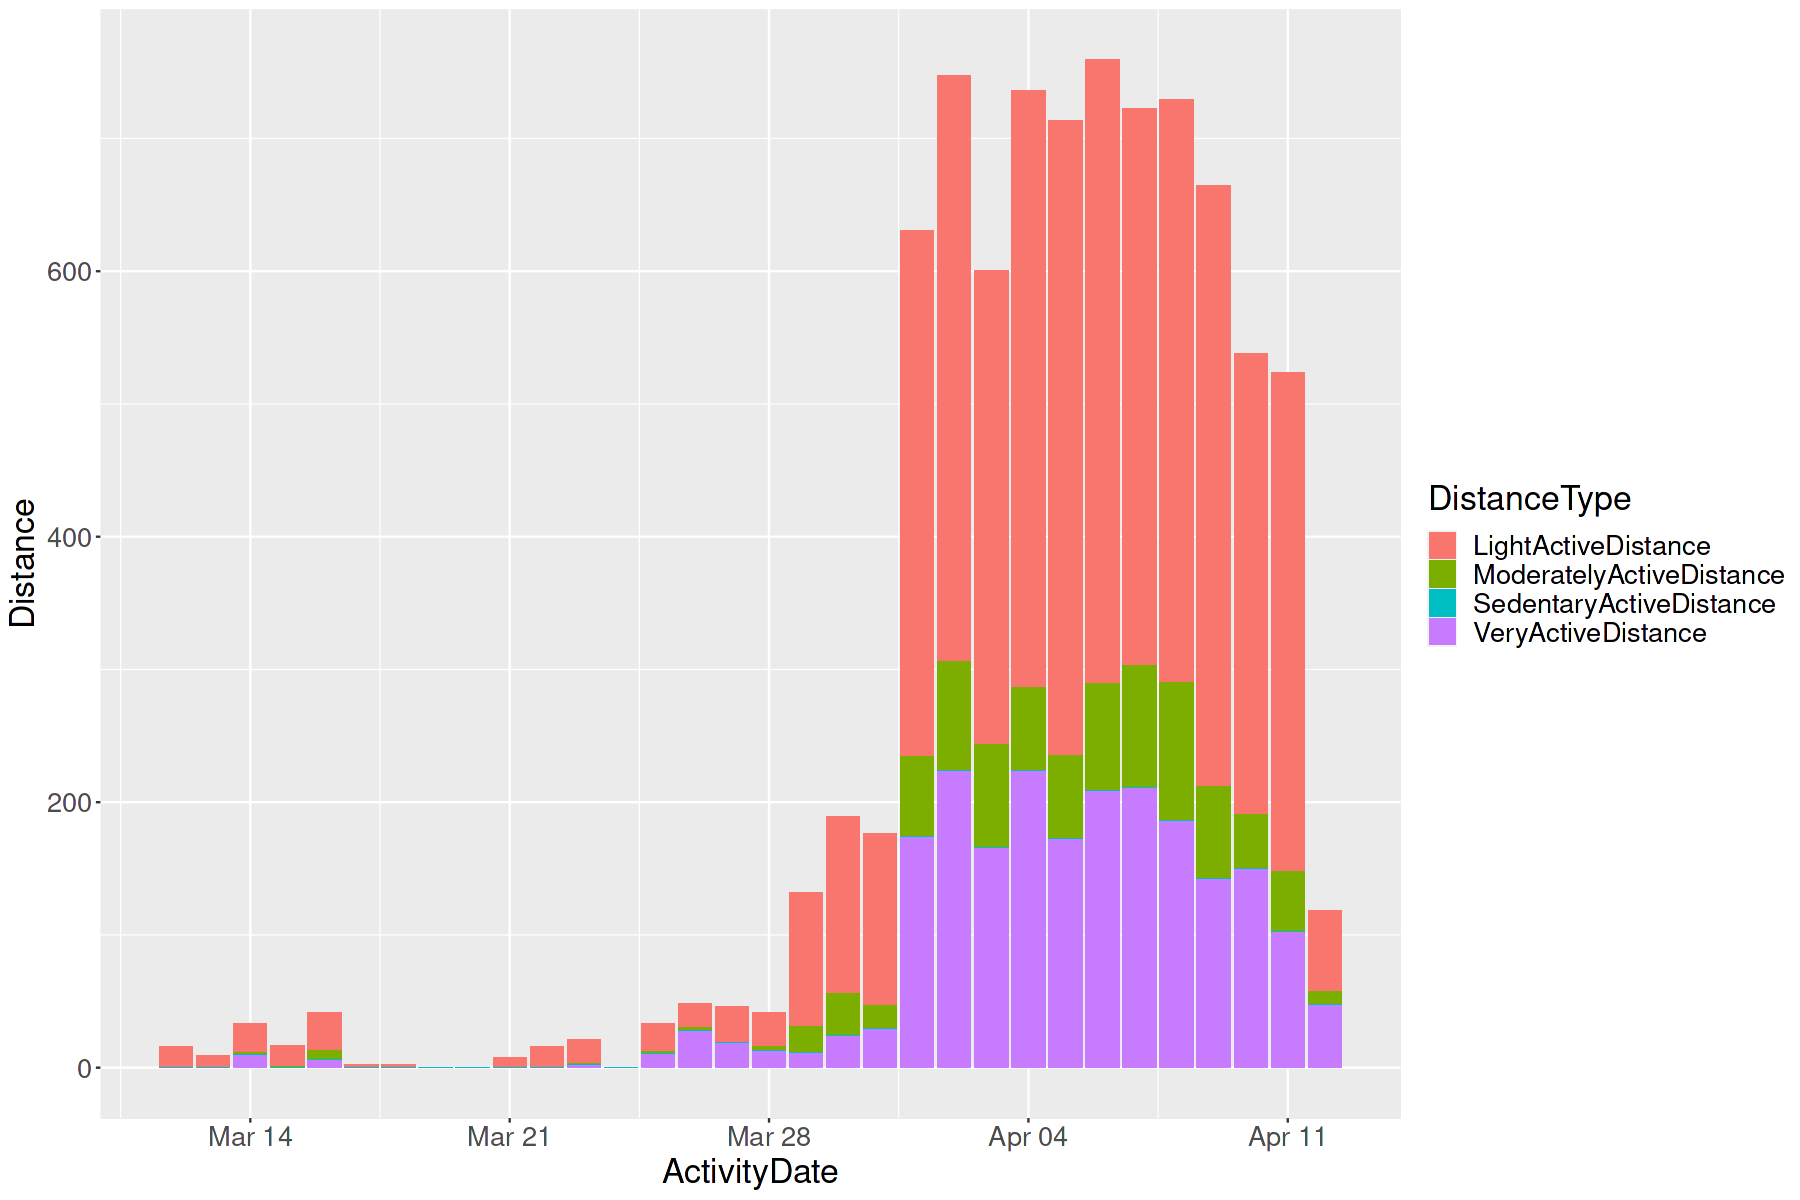

Saving 12.5 x 6.67 in image


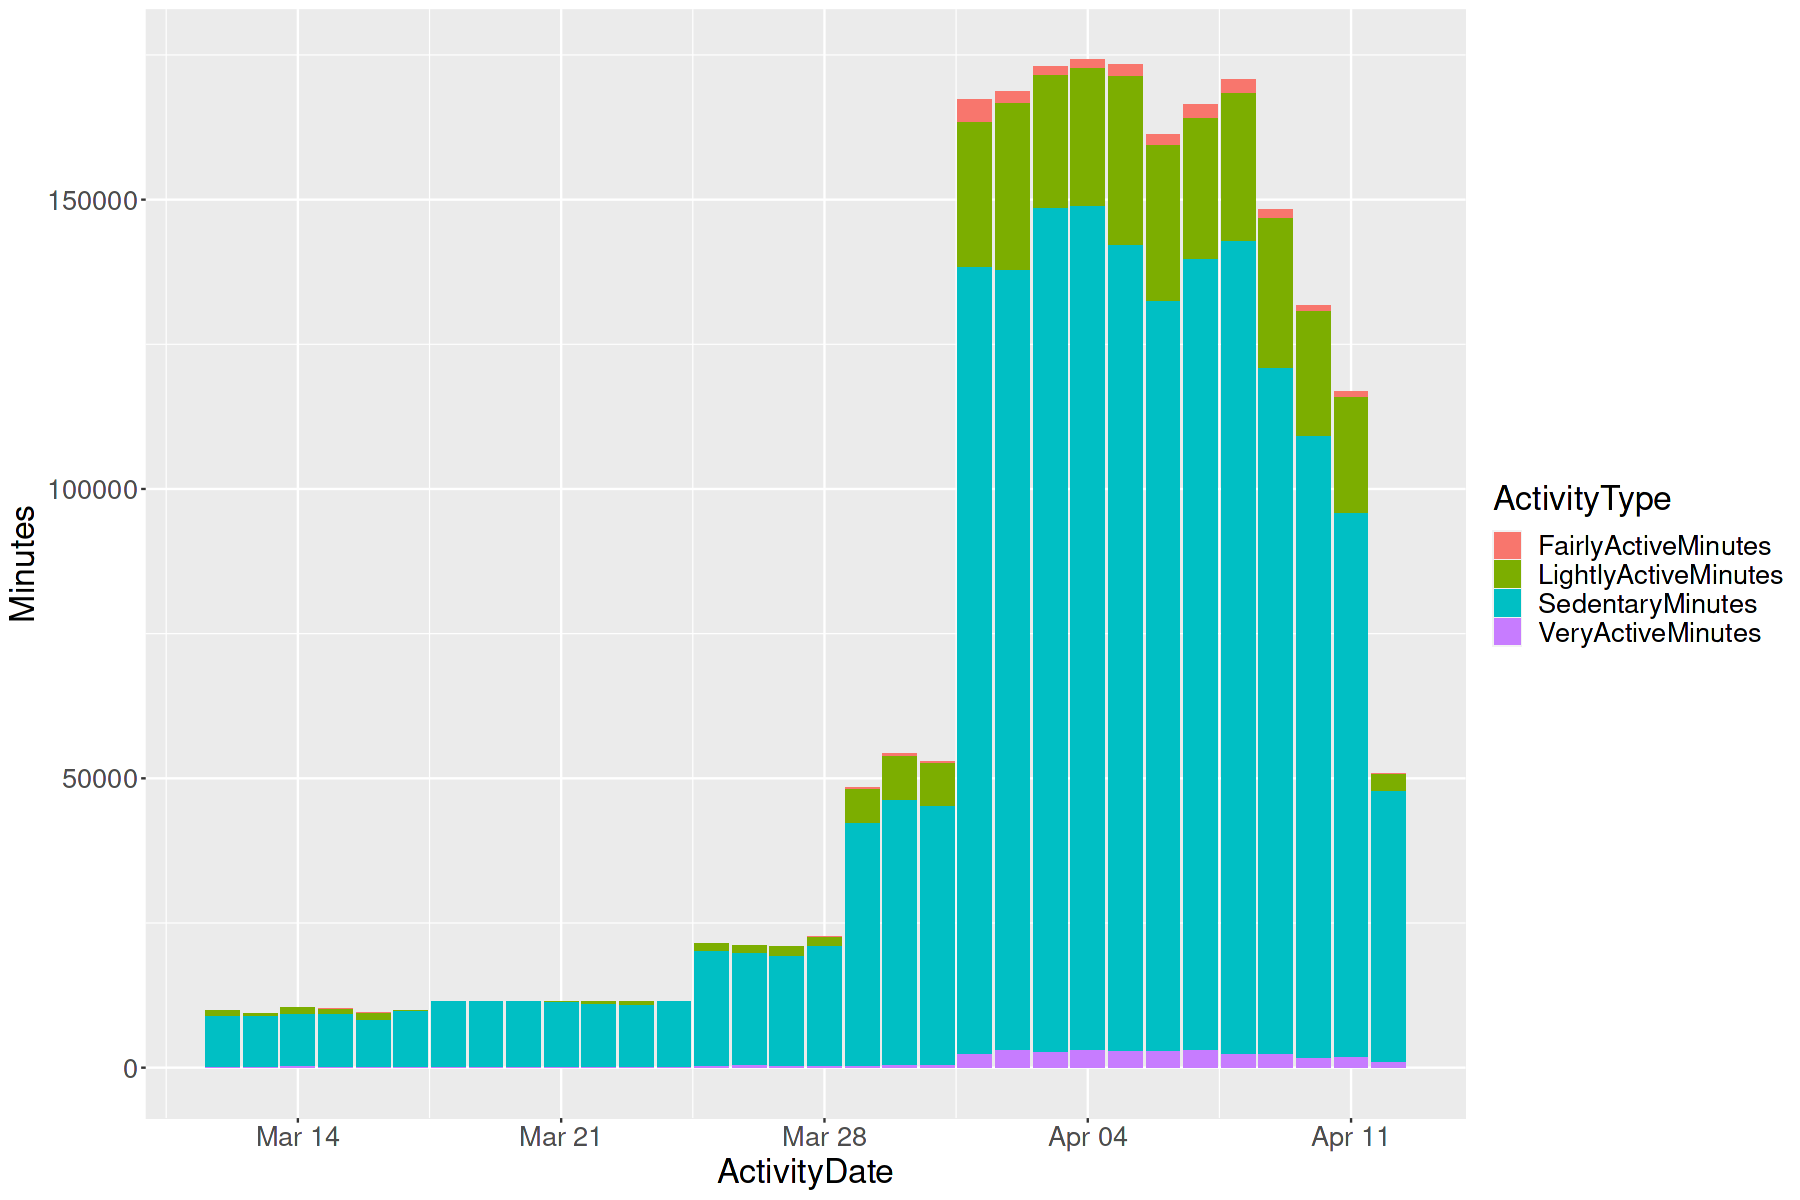

In [19]:
options(repr.plot.width=15, repr.plot.height=10)

# Let's plot the corresponding datetime to each numeric feature
# TotalDistance and TotalSteps
ggplot(activity_long) +
    geom_point(mapping=aes(x=TotalDistance, y=TotalSteps)) +
    ggtitle("Relationship between TotalDistance & TotalSteps") +
    theme(text=element_text(size=20))
ggsave("scatterplot_TotalDistance_TotalSteps.png")

print("We can see a strong correlation between TotalSteps and TotalDistance")

# Stacked plot of VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, 
# SedentaryActiveDistance

ggplot(activity_long) +
    geom_bar(mapping=(aes(x=ActivityDate, y=Distance, fill=DistanceType)), position="stack", stat="identity") +
    theme(text=element_text(size=20))
ggsave("stacked_plot_DistanceType.png")

# Stacked plot of VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes
ggplot(activity_long) +
    geom_bar(mapping=(aes(x=ActivityDate, y=Minutes, fill=ActivityType)), position="stack", stat="identity") +
    theme(text=element_text(size=20))
ggsave("stacked_plot_ActivityType.png")

In [20]:
# Checking the correlation coefficient amongst numeric features
corr_df <- cor(daily_activity[sapply(daily_activity, is.numeric)])
corr_df

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
Id,1.000000000,0.13866155,0.18549529,0.17798284,0.19124249,0.29004790,0.03202895,0.01566598,-0.019149272,0.31596710,0.001877747,-0.07310385,-0.02733601,0.29086751
TotalSteps,0.138661554,1.00000000,0.98678886,0.98299710,0.14638026,0.73368892,0.54183803,0.77556161,0.081964637,0.69969892,0.238388507,0.65441836,-0.28525771,0.58138019
TotalDistance,0.185495286,0.98678886,1.00000000,0.99512175,0.16431170,0.79177795,0.51512825,0.74481166,0.080786923,0.71432005,0.230712112,0.61415199,-0.26030054,0.61364685
TrackerDistance,0.177982840,0.98299710,0.99512175,1.00000000,0.09489022,0.78935322,0.51609862,0.73757033,0.077460767,0.71180357,0.232300868,0.59804323,-0.25808330,0.61206595
LoggedActivitiesDistance,0.191242492,0.14638026,0.16431170,0.09489022,1.00000000,0.15475395,0.06012288,0.11567139,0.091090956,0.21825279,0.231675361,0.13385599,-0.09299056,0.14873993
VeryActiveDistance,0.290047901,0.73368892,0.79177795,0.78935322,0.15475395,1.00000000,0.24044026,0.26458029,0.044665767,0.85429233,0.129528196,0.19359312,-0.08772620,0.43413349
ModeratelyActiveDistance,0.032028948,0.54183803,0.51512825,0.51609862,0.06012288,0.24044026,1.00000000,0.32695858,0.016349925,0.27272025,0.480905865,0.29190567,-0.23672280,0.30078089
LightActiveDistance,0.015665981,0.77556161,0.74481166,0.73757033,0.11567139,0.26458029,0.32695858,1.00000000,0.069051468,0.27664898,0.112306666,0.85755487,-0.34356047,0.45123899
SedentaryActiveDistance,-0.019149272,0.08196464,0.08078692,0.07746077,0.09109096,0.04466577,0.01634992,0.06905147,1.000000000,0.03232203,-0.003360665,0.11016176,0.04228002,0.09687410
VeryActiveMinutes,0.315967100,0.69969892,0.71432005,0.71180357,0.21825279,0.85429233,0.27272025,0.27664898,0.032322029,1.00000000,0.167764423,0.19969669,-0.17765209,0.51890531


In [21]:
head(hourly_activity)

,Id,ActivityHour,StepTotal,Calories,TotalIntensity,AverageIntensity,HourOnly
,<dbl>,<dttm>,<int>,<int>,<int>,<dbl>,<chr>
1,1503960366,2016-04-12 00:00:00,373,81,20,0.333333,00:00:00
2,1503960366,2016-04-12 01:00:00,160,61,8,0.133333,01:00:00
3,1503960366,2016-04-12 02:00:00,151,59,7,0.116667,02:00:00
4,1503960366,2016-04-12 03:00:00,0,47,0,0.000000,03:00:00
5,1503960366,2016-04-12 04:00:00,0,48,0,0.000000,04:00:00
6,1503960366,2016-04-12 05:00:00,0,48,0,0.000000,05:00:00


In [22]:
# Let's group the hour only
hourly_activity_summary <- hourly_activity %>%
    group_by(HourOnly) %>%
    summarize(AverageStepTotal=mean(StepTotal), AverageCalories=mean(Calories))

head(hourly_activity_summary)

HourOnly,AverageStepTotal,AverageCalories
<chr>,<dbl>,<dbl>
00:00:00,42.188437,71.80514
01:00:00,23.102894,70.16506
02:00:00,17.110397,69.18650
03:00:00,6.426581,67.53805
04:00:00,12.699571,68.26180
05:00:00,43.869099,81.70815


Saving 12.5 x 6.67 in image


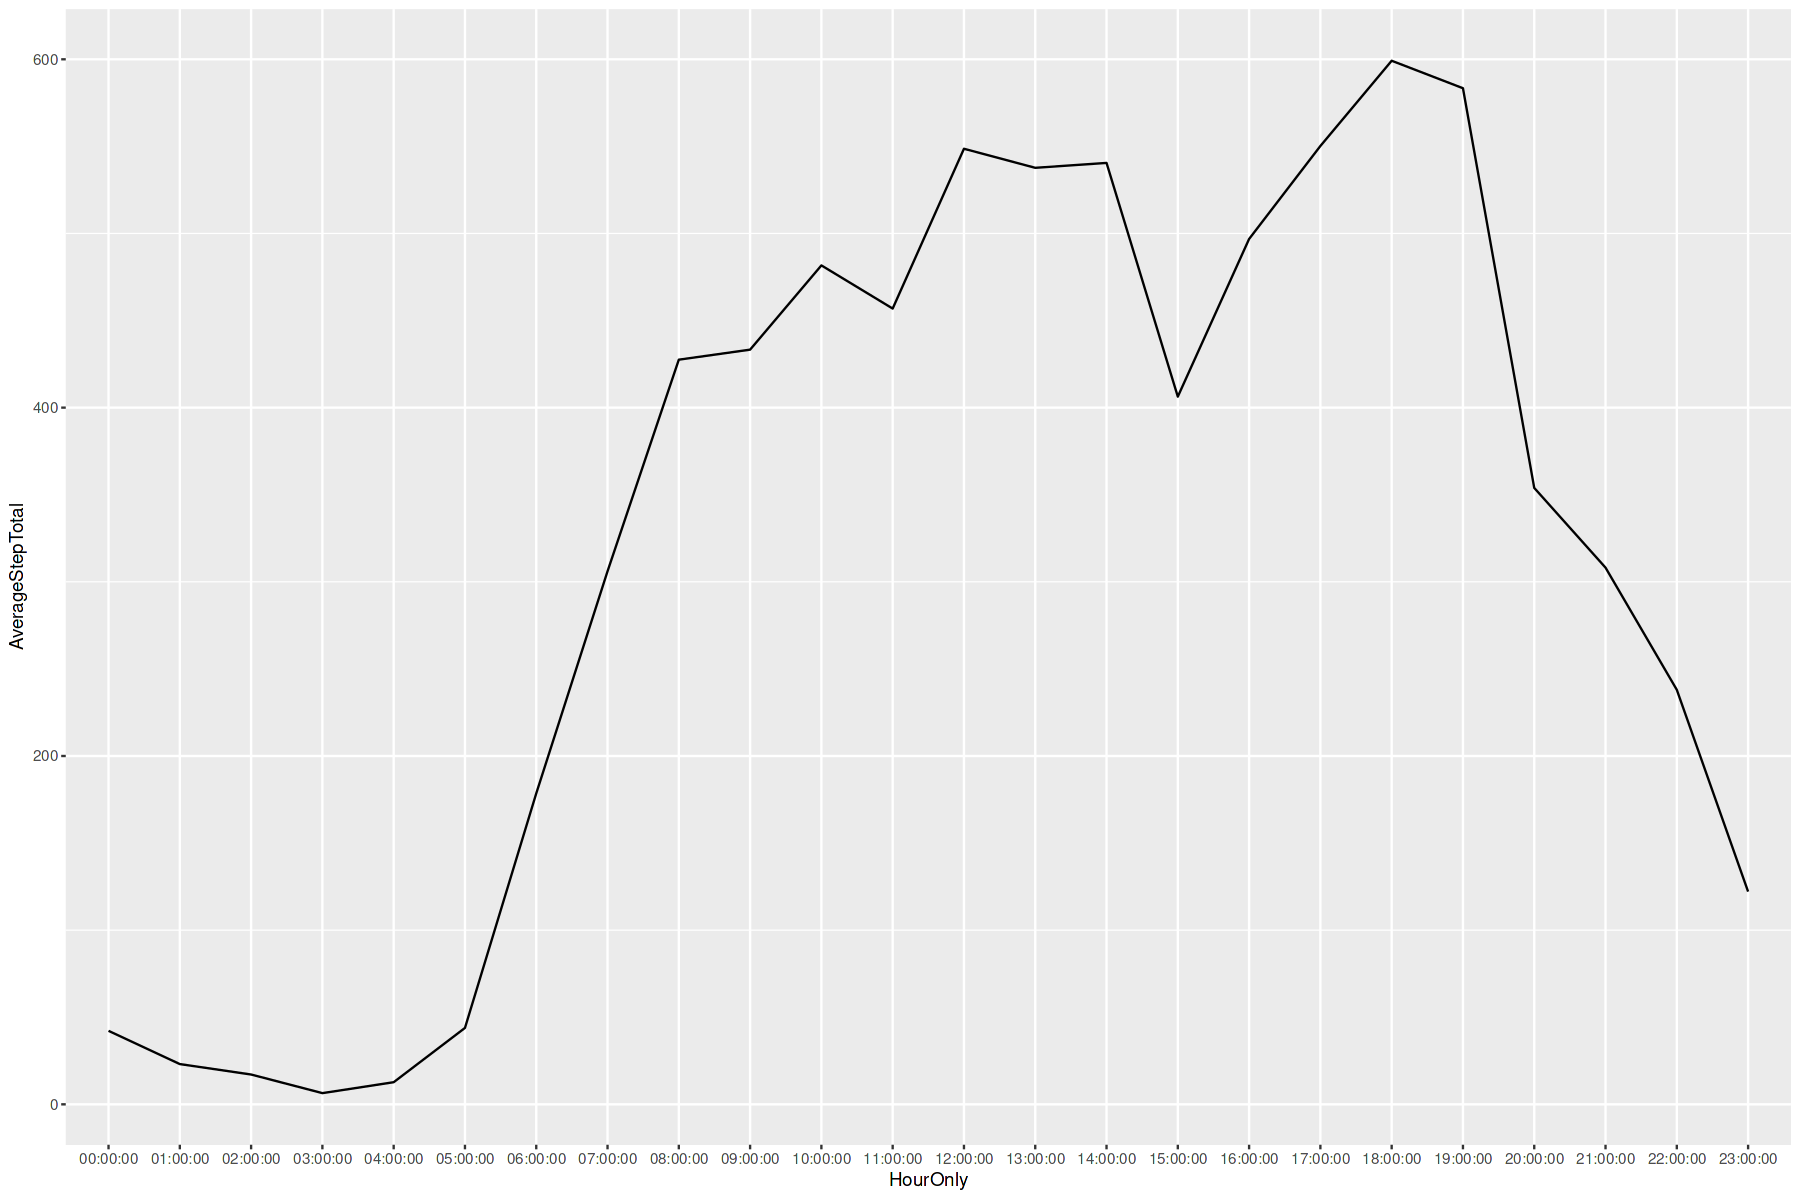

In [23]:
# Now Let's plot each hour
ggplot(hourly_activity_summary, aes(x = HourOnly, y = AverageStepTotal)) + geom_line(group=1)
ggsave("hourly_activity_steps.png")

Saving 12.5 x 6.67 in image


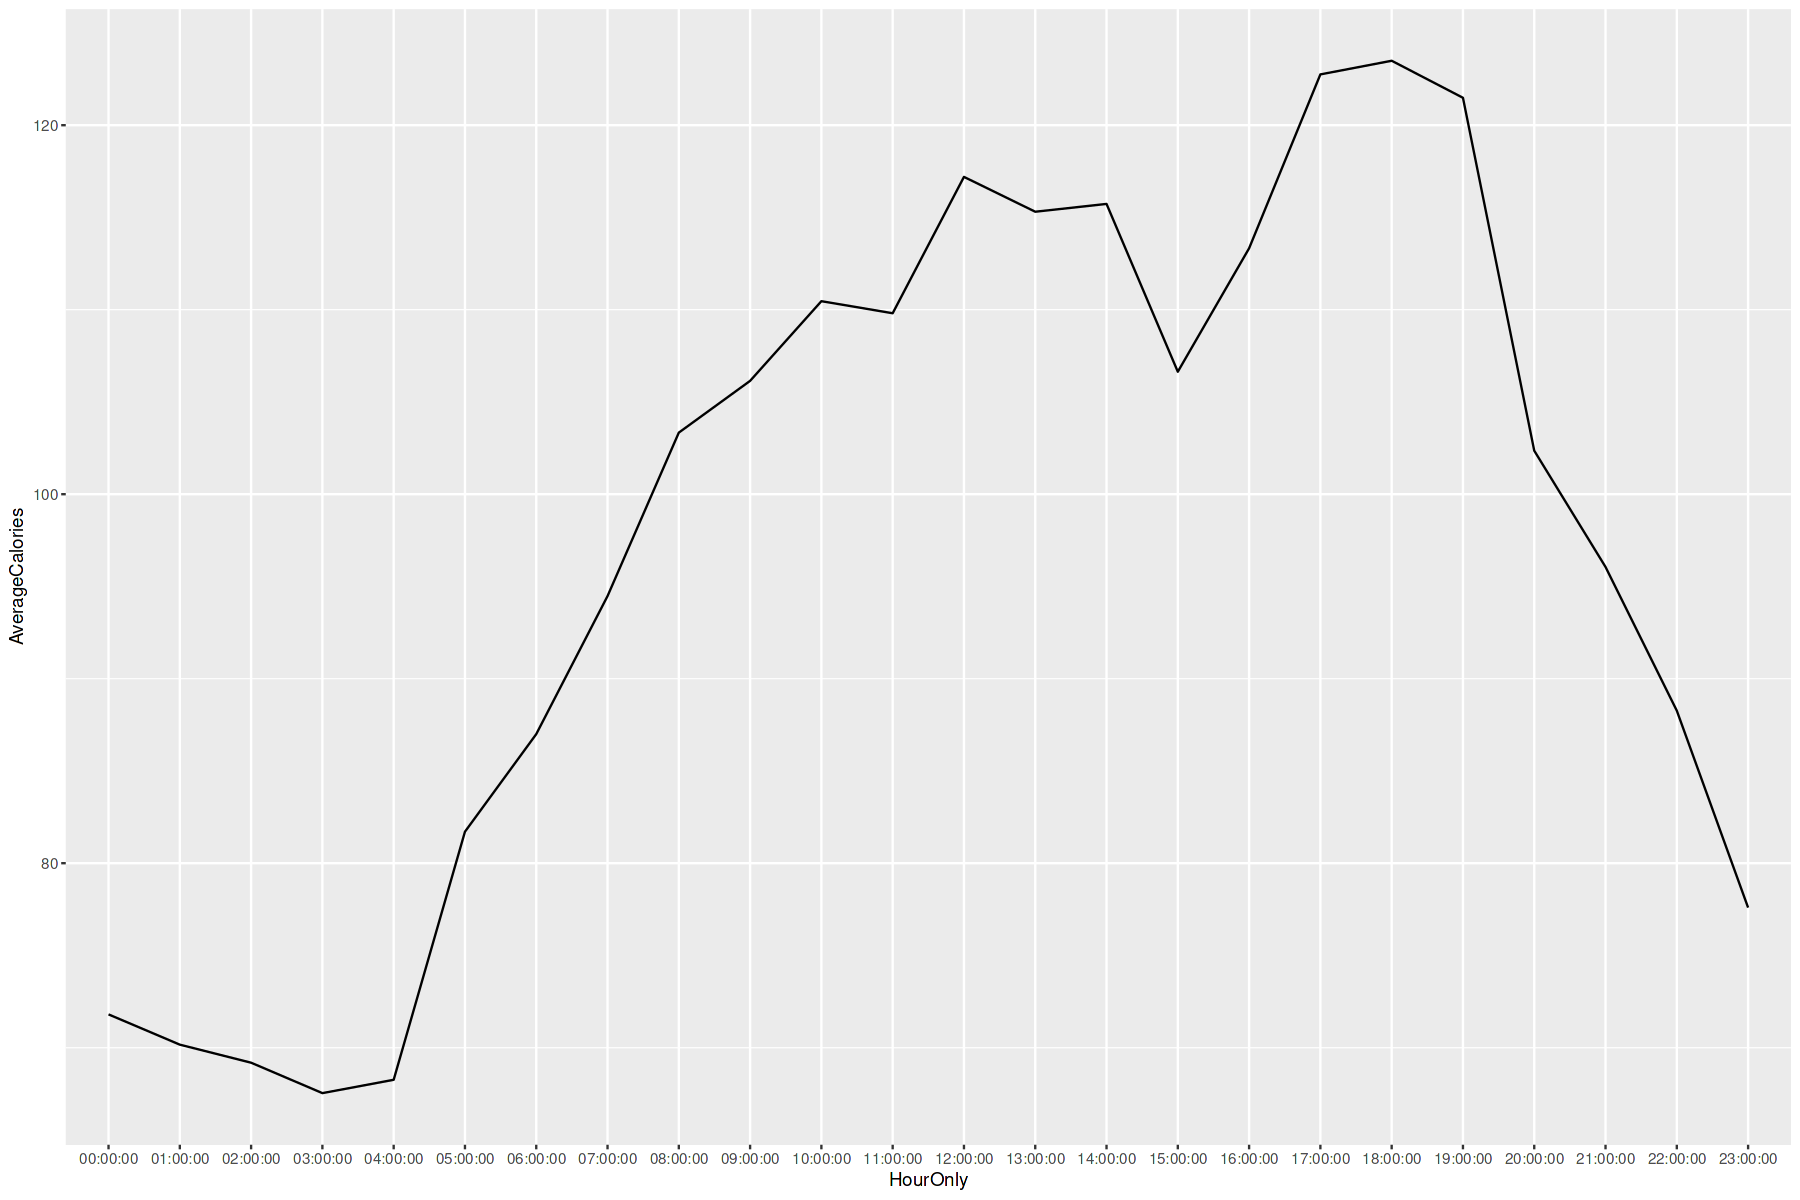

In [24]:
# Now Let's plot each hour
ggplot(hourly_activity_summary, aes(x = HourOnly, y = AverageCalories)) + geom_line(group=1)
ggsave("hourly_activity_calories.png")

In [25]:
minute_activity_summary <- minute_activity %>%
    group_by(MinuteOnly) %>%
    summarize(AverageStepTotal=mean(Steps), AverageCalories=mean(Calories), AverageMETs=mean(METs))

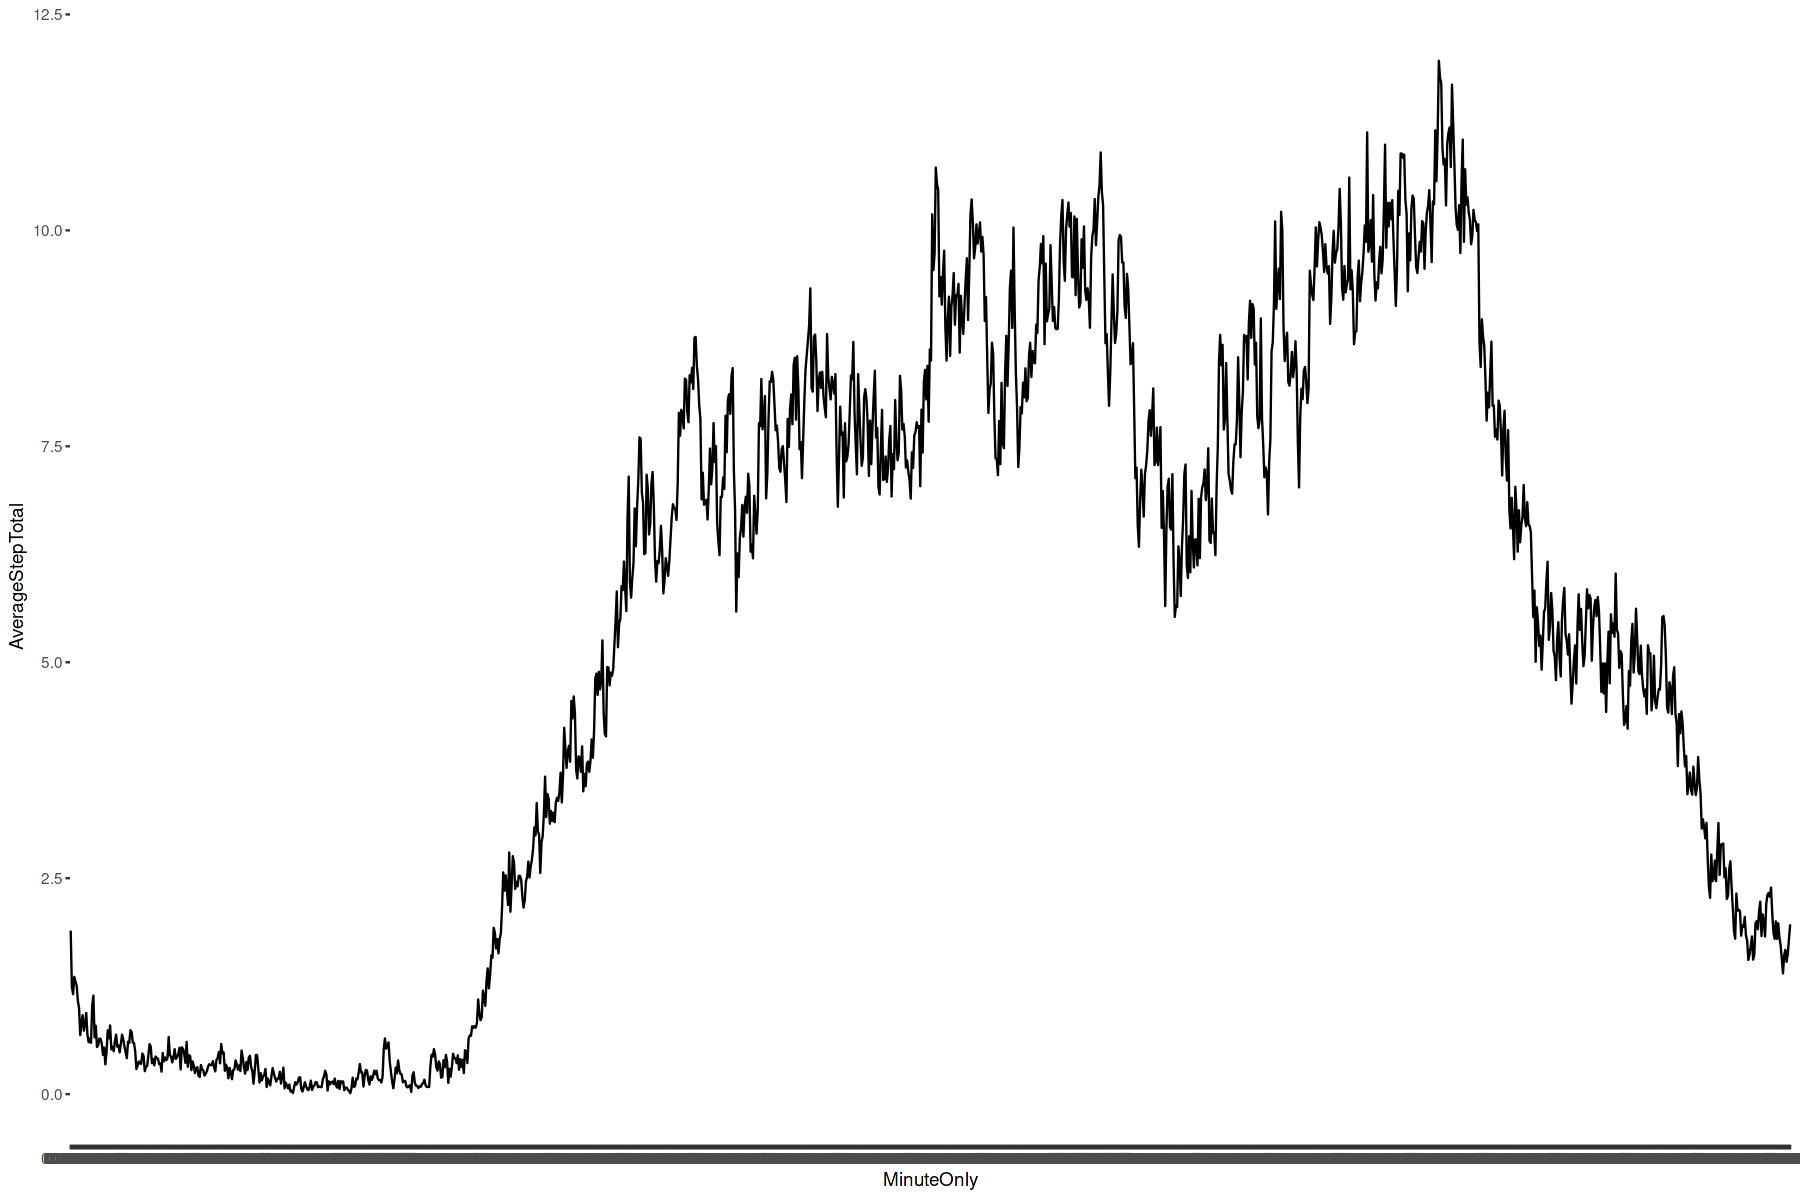

In [26]:
# Now Let's plot the average step every minute
ggplot(minute_activity_summary, aes(x = MinuteOnly, y = AverageStepTotal)) + geom_line(group=1)

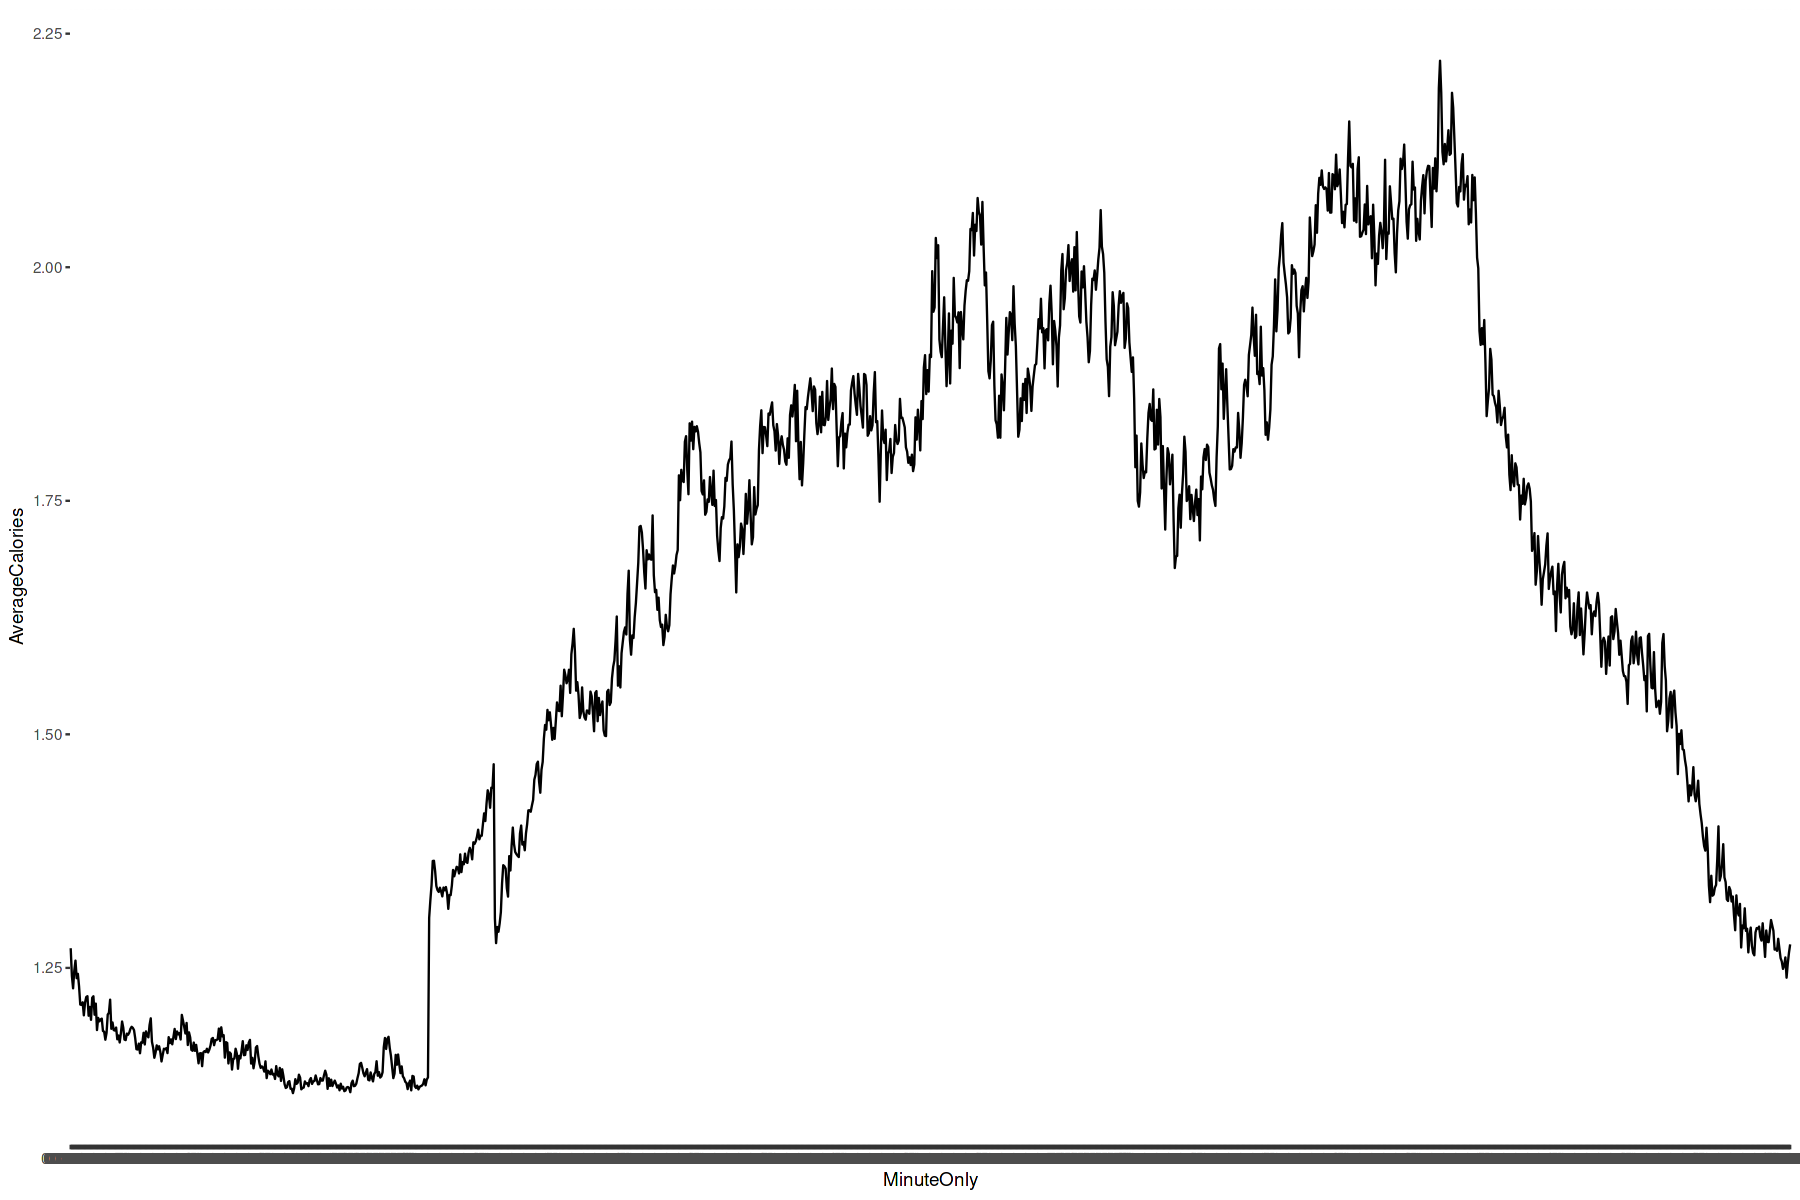

In [27]:
# Now Let's plot each hour
ggplot(minute_activity_summary, aes(x = MinuteOnly, y = AverageCalories)) + geom_line(group=1)

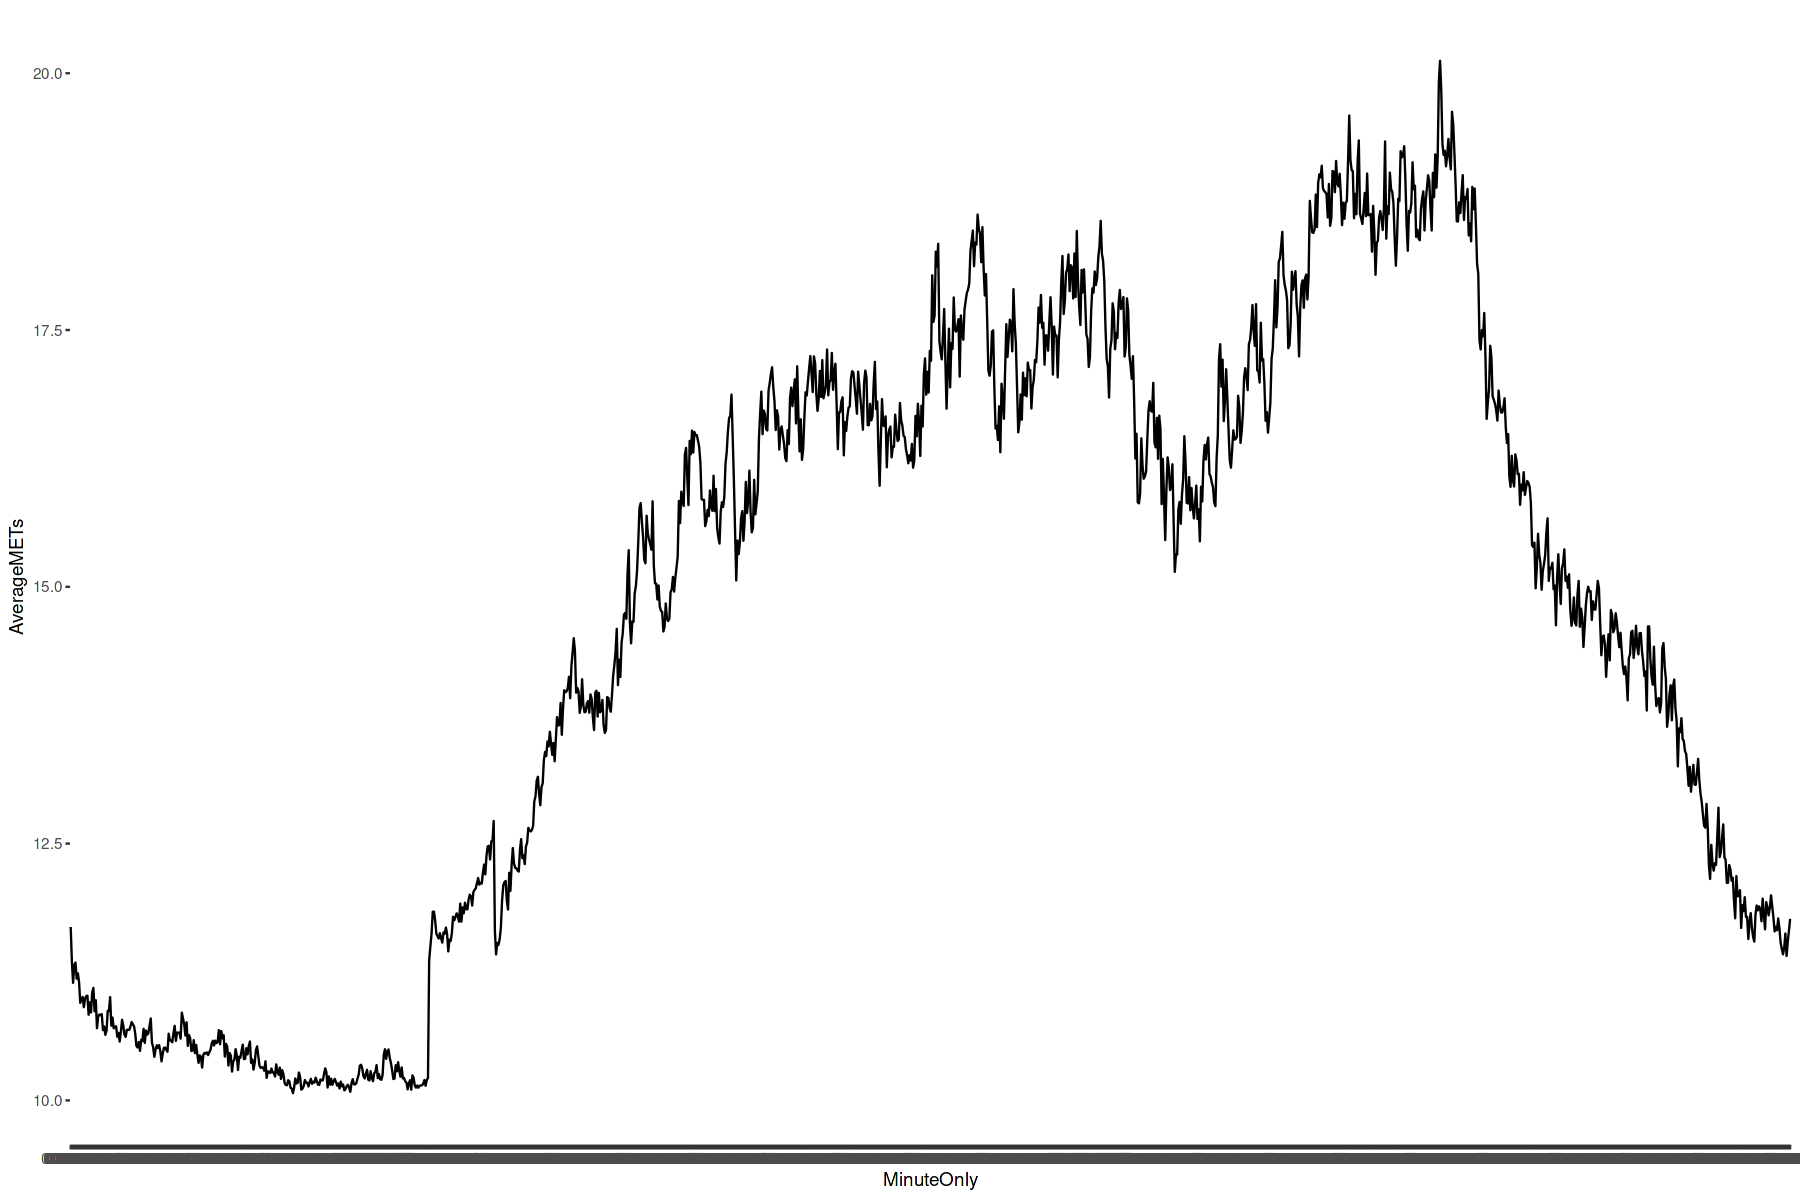

In [28]:
# Now Let's plot each hour
ggplot(minute_activity_summary, aes(x = MinuteOnly, y = AverageMETs)) + geom_line(group=1)

In [29]:
# Task Analyze all dataset per individual
hourly_activity_ind <- hourly_activity %>%
    group_by(Id, HourOnly) %>%
    summarize(AverageStepTotal=mean(StepTotal), AverageCalories=mean(Calories), .groups='drop')

In [30]:
head(hourly_activity_ind)

Id,HourOnly,AverageStepTotal,AverageCalories
<dbl>,<chr>,<dbl>,<dbl>
1503960366,00:00:00,142.66667,60.96667
1503960366,01:00:00,50.10000,53.86667
1503960366,02:00:00,29.00000,50.26667
1503960366,03:00:00,11.83333,48.63333
1503960366,04:00:00,3.60000,47.70000
1503960366,05:00:00,2.10000,47.56667


In [31]:
unique(hourly_activity_ind$Id)

[1] 1503960366 1624580081 1644430081 1844505072 1927972279 2022484408
 [7] 2026352035 2320127002 2347167796 2873212765 3372868164 3977333714
[13] 4020332650 4057192912 4319703577 4388161847 4445114986 4558609924
[19] 4702921684 5553957443 5577150313 6117666160 6290855005 6775888955
[25] 6962181067 7007744171 7086361926 8053475328 8253242879 8378563200
[31] 8583815059 8792009665 8877689391

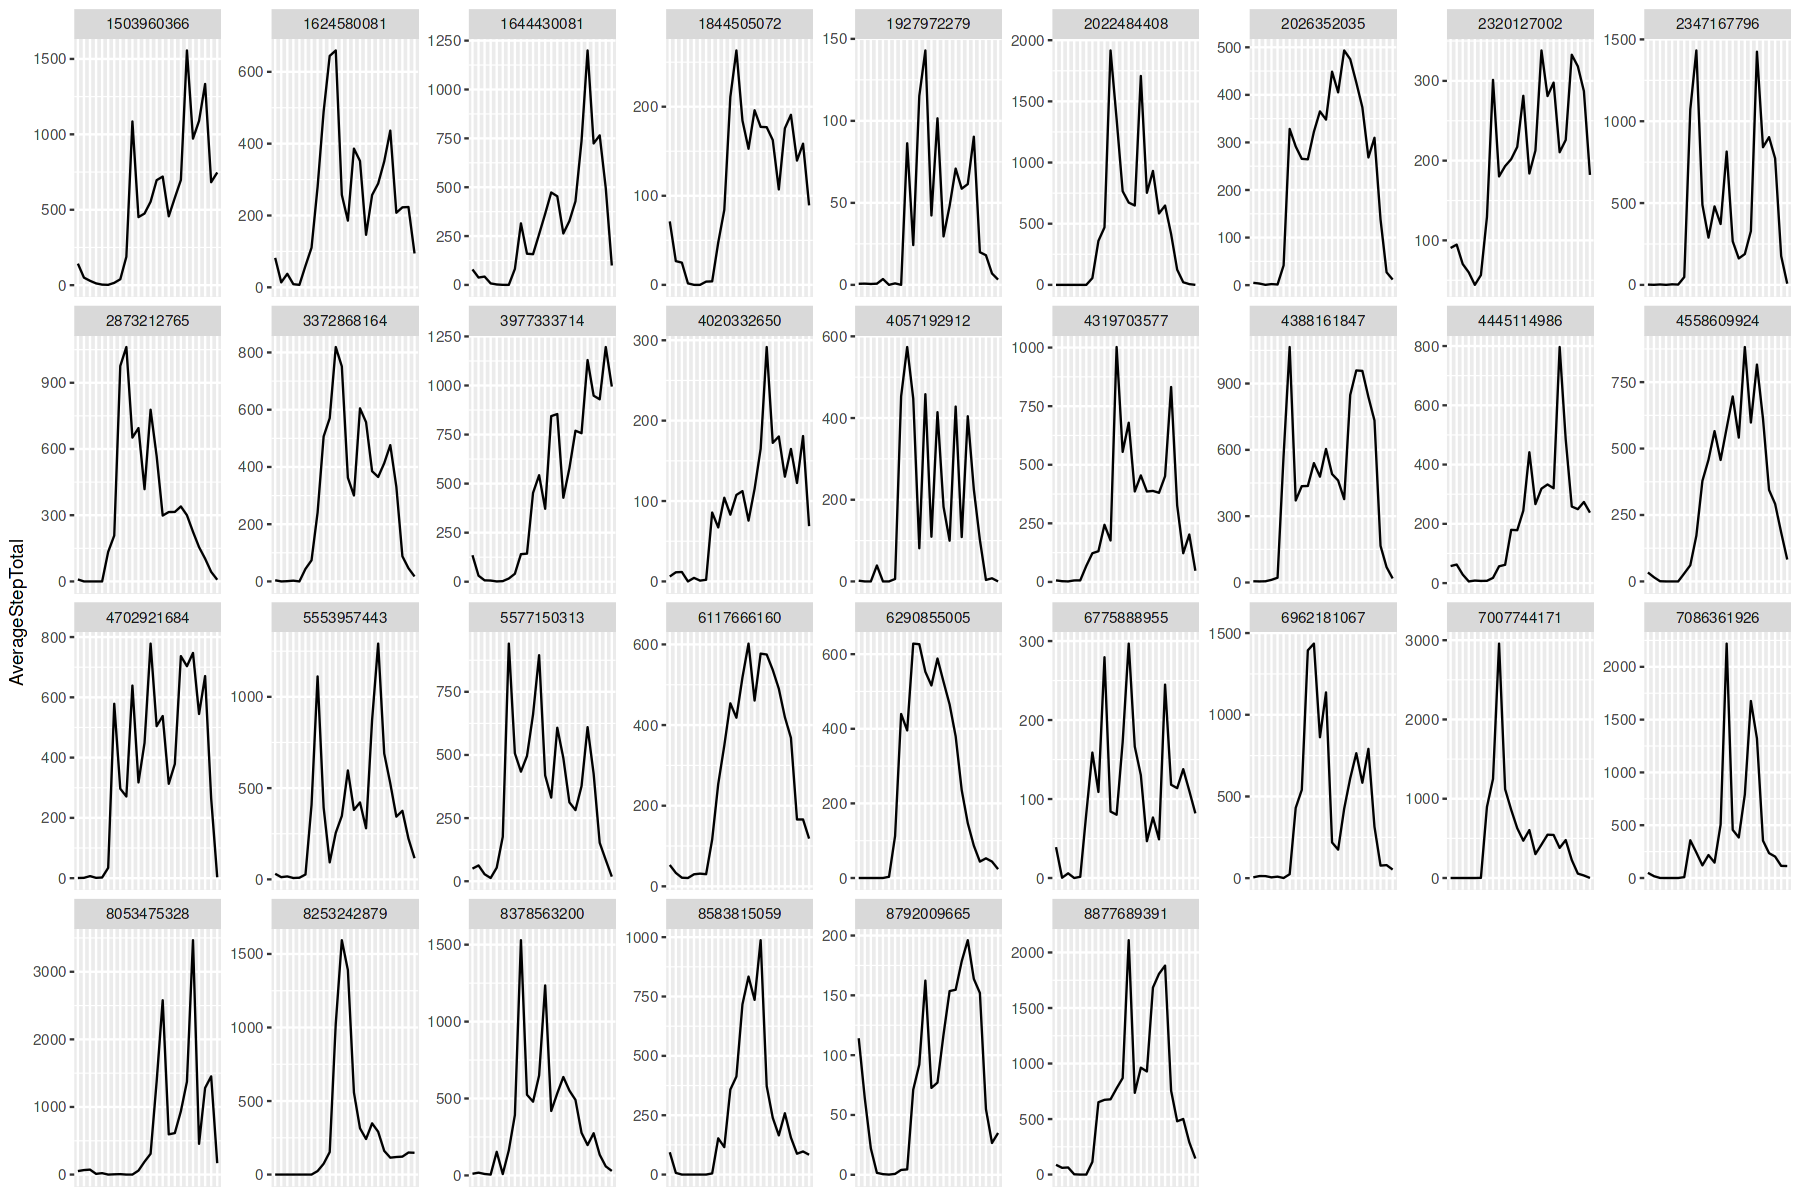

In [32]:
options(repr.plot.width=15, repr.plot.height=10)

hourly_activity_ind %>%
#     filter(Id == 1503960366) %>% # If you want to filter just 1 individual
    ggplot(aes(x = HourOnly, y = AverageStepTotal)) + geom_line(group=1) +
    facet_wrap(~Id, ncol=9, scale="free_y") +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())

ggsave("hourly_activity_steps_individual.png", width=15, height=8)

In [33]:
head(heartrate)

,Id,Time,Value,TimeOnly
,<dbl>,<dttm>,<int>,<chr>
1,2022484408,2016-04-12 07:21:00,97,07:21:00
2,2022484408,2016-04-12 07:21:05,102,07:21:05
3,2022484408,2016-04-12 07:21:10,105,07:21:10
4,2022484408,2016-04-12 07:21:20,103,07:21:20
5,2022484408,2016-04-12 07:21:25,101,07:21:25
6,2022484408,2016-04-12 07:22:05,95,07:22:05


In [34]:
# Task Analyze all dataset per individual
heartrate_summary <- heartrate %>%
    group_by(Id, TimeOnly) %>%
    summarize(AverageHeartRate=mean(Value), .groups='drop')

head(heartrate_summary)

Id,TimeOnly,AverageHeartRate
<dbl>,<chr>,<dbl>
2022484408,06:00:05,75
2022484408,06:00:15,79
2022484408,06:00:20,77
2022484408,06:00:35,75
2022484408,06:00:40,71
2022484408,06:00:45,73


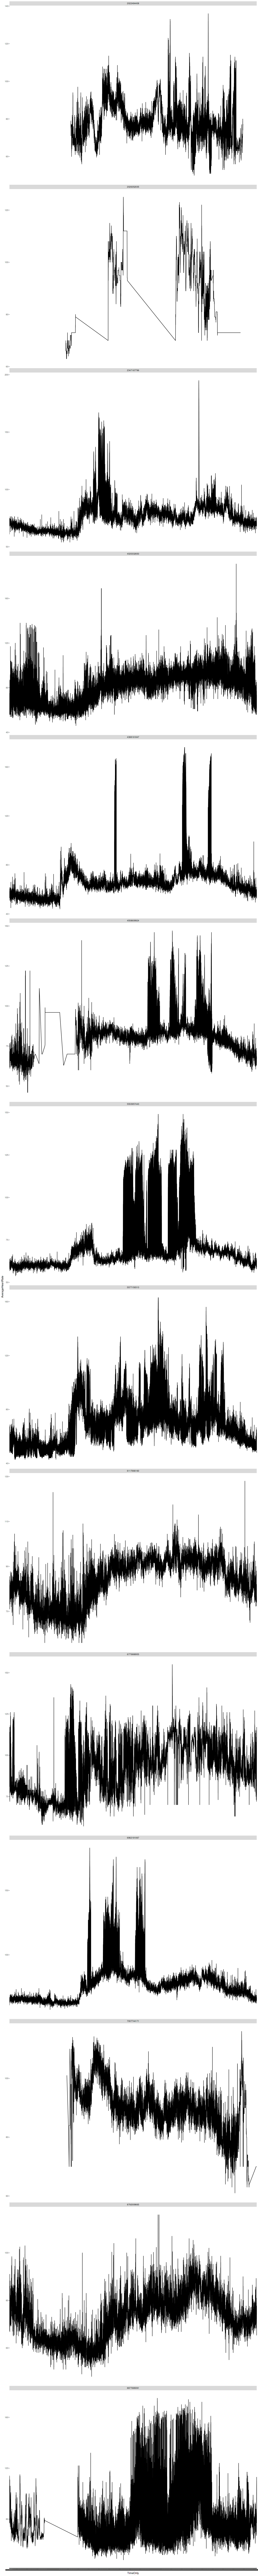

In [35]:
options(repr.plot.width=15, repr.plot.height=150)

heartrate_summary %>%
#     filter(Id == 2022484408) %>%
    ggplot(aes(x = TimeOnly, y = AverageHeartRate)) + geom_line(group=1)  +
    facet_wrap(~Id, ncol=1, scale="free_y")

In [36]:
weight_class <- count(weight, BMI_Class, sort = TRUE)
weight_class

BMI_Class,n
<chr>,<int>
Normal weight,34
Pre-obesity,32
Obesity Class III,1


Saving 12.5 x 6.67 in image


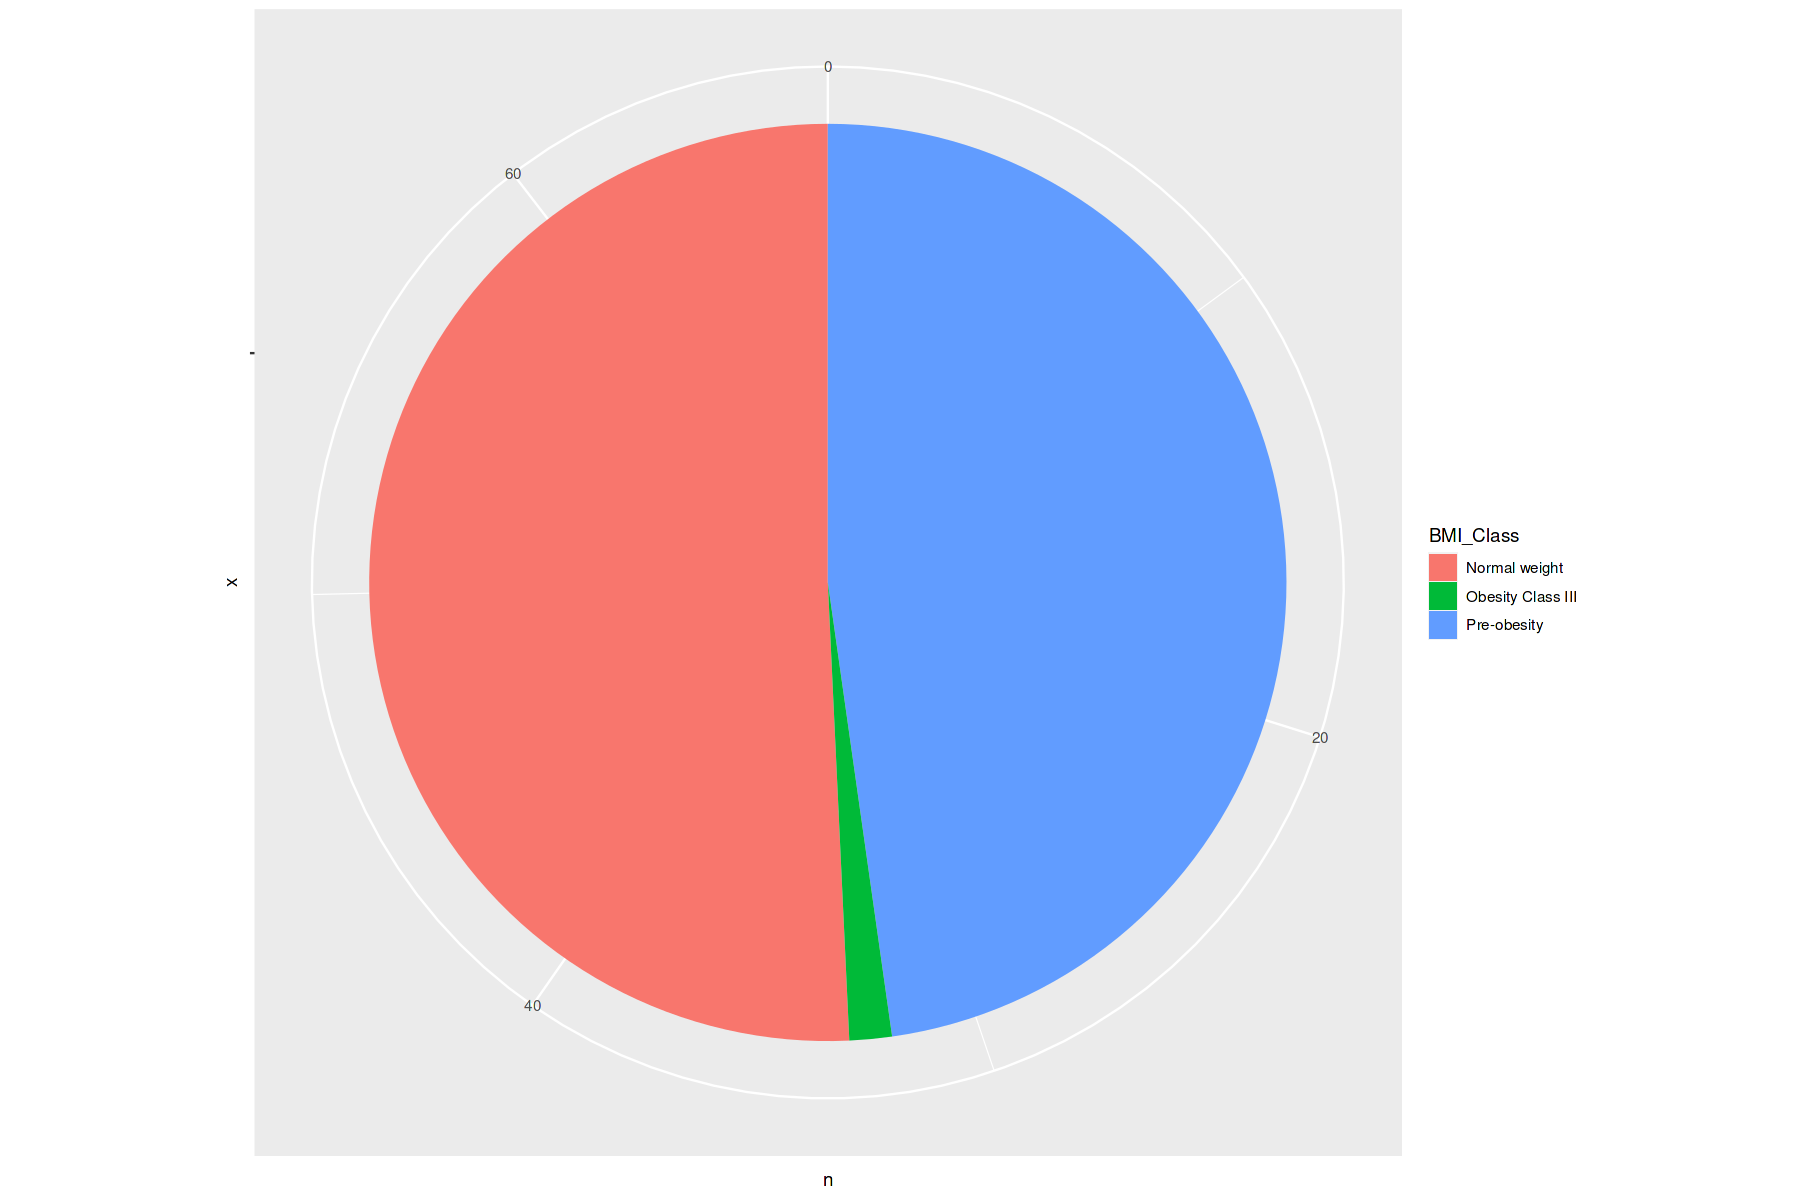

In [37]:
options(repr.plot.width=15, repr.plot.height=10)

# Let's take a look at the percentage of our recorded bmi
ggplot(weight_class, aes(x="",y=n, fill=BMI_Class)) + geom_bar(stat="identity", width=1) +
  coord_polar("y", start=0)
ggsave("bmi_class_pie_chart.png")

In [38]:
head(weight)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId,HeightM,BMI_Class
,<dbl>,<chr>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,True,1.462234e+12,1.523908,Normal weight
2,1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,True,1.462320e+12,1.523908,Normal weight
3,1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,False,1.460510e+12,1.675757,Obesity Class III
4,2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,True,1.461283e+12,1.625840,Normal weight
5,2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,True,1.463098e+12,1.625352,Normal weight
6,4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,True,1.460938e+12,1.624045,Pre-obesity


### <font color="red">Trends and Relationships</font>
#### Daily Activity
- We can see a strong correlation (relationship) between the TotalSteps and TotalDistance is ~0.99

# <font color="red">Share</font>

Now that we're done with our analysis, we can now share the insights we have gathered to our stakeholders.

- [Presentation -- Bellabeat: How Can We Play it Smart?](https://docs.google.com/presentation/d/e/2PACX-1vQ37jwF3sXImdFdRO6lj3yZwqsxyn-nzCBkndP60AFZW-bjX7xMPUpJV2V0KgXKJwjMtSQQo19oekat/pub?start=false&loop=false&delayms=3000)

# <font color="red">Act</font>

After sharing the following presentation to our stakeholders, we can now provide what next steps we should take.
### Next Steps
- Collecting more data all throughout the year to determine if there is seasonality involved for better marketing campaigns.
- The dataset we have used may have created some bias since we only have a few users. It may be helpful to add additional users that is selected randomly and didn't volunteer.

#### Daily Activity
- From the stacked plot, we can see that people mostly use it are for light walk/jog or for running -- this will be useful for targeting the right people during any marketing campaign.
- The date might also be a factor (or seasonality in the data may be explored). Most people only used the smartwatch around first week of April.
    - Factors such as New Year would be a great time to invest in marketing (The time for New Year's resolutions, changes, etc.)
- Aside from people who likes to walk/jog/run, secondary targets are people who love to exercise with the following prioritization:
    1. Lightly Active People
    2. Very Active People
    3. Moderately Active People
    4. Sedentary People
    
    
    - Explanation: We noticed that people mostly used the smartwatch for light activities. We can see this from the average activity daily from the summary statistics earlier:
        - Sedentary Minutes: 995 minutes
        - Lightly Active Minutes: 170 minutes
        - Fairly Active Minutes: 13 minutes
        - Very Active Minutes: 16 minutes
    - Even though sedentary minutes is the highest, people who use it can't be exercising the whole day. People might be doing other things before/after they exercise. Thus, including sedentary minutes in our prioritization might not be useful.
    
#### Hourly Activity
- The hourly activity will be useful for doing some activity notifications.
    - People usually start some activity in the morning (at 8:00 AM)
    - They increase it at 12:00 PM, but might rest at 3:00 PM
    - They start doing some activity once again at 4:00 PM and peak at 5:00 PM
    - They slow down until 8:00 PM and do rest until 11:00 PM
- This might be a good basis for new users, however, it must be customized for each individual for a personalized activity notification.
- From the facet plot (multiple plots per individual) -- we can really see that individuals' activity vary a lot.
    - For new users, it may be useful to classify their activity (morning, afternoon, or evening activity)
    - Using the personalized notification will help a lot in levelling up the usefulness of the app. 

#### Per Minute Activity
- Some of the dataset can be divided into narrow and wide types. The wide dataset may be useful when we use deep learning for better predictability.

#### Sporadic Activity
- We can see that most of our records are Normal weight, then pre-obesity, and in obesity class III
- We can deduce the people who want to reduce weight are more likely to buy a smartwatch

#### Other Useful Features
- Since the product will be for women, it might be useful to have some tracking of menstrual cycle (because we don't have that in our dataset)